In [1]:
import matplotlib.pyplot as plt
import numpy as np

from one.models import NHiTSModel
from one.threshold import QuantileThreshold
from one.generator import UnivariateWaveGenerator

2022-09-26 18:12:41.623811: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-26 18:12:41.632105: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-26 18:12:41.632339: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [14]:
plt.rcParams["figure.figsize"] = (10,4)

In [10]:
# Generate Syntetic Anoms
generator = UnivariateWaveGenerator(1000, train_ratio=0.5)
generator.point_contextual_outliers(0.01, 2.5, 50)

In [11]:
# Fit Model
model = NHiTSModel(use_gpu=True)
model.fit(generator.train)
scores = model.get_scores(generator.test)

2022-09-26 18:13:34 darts.models.forecasting.nhits INFO: (N-HiTS): Using automatic kernel pooling size: ((5,), (2,), (1,)).
2022-09-26 18:13:34 darts.models.forecasting.nhits INFO: (N-HiTS):  Using automatic downsampling coefficients: ((1,), (1,), (1,)).
2022-09-26 18:13:34 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 390 samples.
2022-09-26 18:13:34 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 32-bits; casting model to float32.
/usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/connectors/callback_connector.py:96: LightningDeprecationWarning: Setting `Trainer(progress_bar_refresh_rate=100)` is deprecated in v1.5 and will be removed in v1.7. Please pass `pytorch_lightning.callbacks.progress.TQDMProgressBar` with `refresh_rate` directly to the Trainer's `callbacks` argument instead. Or, to disable the progress bar pass `enable_progress_bar = False` to the Trainer.
  rank_zero_deprecation(
2022-09-26 18:13:34

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

2022-09-26 18:13:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 13it [00:00, ?it/s]

In [12]:
# Get Threshold
threshold_method = QuantileThreshold()
thres = threshold_method.get_threshold(scores, 0.99)

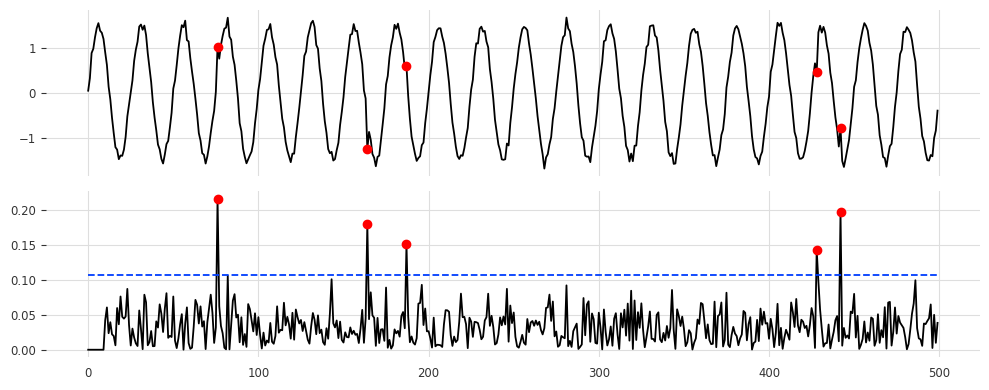

In [15]:
# Plot
plot(generator.test, generator.label, scores, thres)

In [7]:
def plot(series, labels, scores, threshold):
    fig, (ax1, ax2) = plt.subplots(2, sharex=True)

    anoms = np.where(labels == 1)[0]
    ax1.plot(series)
    ax1.plot(anoms, series[anoms], "ro")
    
    
    
    ax2.plot(scores)
    ax2.plot(threshold, "--")

    anom_pred = np.where(scores>threshold)[0]
    ax2.plot(anom_pred, scores[anom_pred], "ro")

    fig.tight_layout()
    fig.show